# Step 1 - Data Processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

!pip install scikit-plot
import scikitplot as skplt
import scikitplot.estimators as esti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 14.5 MB/s 
     |████████████████████████████████| 162 kB 85.5 MB/s 
     |████████████████████████████████| 182 kB 87.5 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 162 kB 69.2 MB/s 
     |████████████████████████████████| 158 kB 80.2 MB/s 
     |████████████████████████████████| 157 kB 90.3 MB/s 
     |████████████████████████████████| 157 kB 97.7 MB/s 
     |████████████████████████████████| 157 kB 75.3 MB/s 
     |████████████████████████████████| 157 kB 63.4 MB/s 
     |████████████████████████████████| 157 kB 74.0 MB/s 
     |████████████████████████████████| 157 kB 88.5 MB/s 
     |████████████████████████████████| 157 kB 94.2 MB/s 
     |████████████████████████████████| 156 kB 85.

In [ ]:
# Upload the csv file in Google Colab before executing the code

In [ ]:
#Load the data set
data = pd.read_csv("MP2_Data.csv")
data.head()
print("Number of Rows before removing students with 0 score: ", len(data.index))

# removing rows with total score as 0
data = data[data['Week8_Total'] != 0]
print("Number of Rows after removing students with 0 score: ", len(data.index))

pass_fail = []
for i in data['Grade']:
  if i >= 3: pass_fail.append('Pass')
  else: pass_fail.append('Fail')
data["Pass_Fail"] = pass_fail

# aggregating quiz scores
data["Agg_Quiz"] = data["Week2_Quiz1"] + data["Week4_Quiz2"] + data["Week6_Quiz3"]
data["Agg_Mini_Project"] = data["Week3_MP1"] + data["Week5_MP2"] + data["Week7_MP3"]
data["Agg_Peer_Review"] = data["Week3_PR1"] + data["Week5_PR2"] + data["Week7_PR3"]
data["Agg_Week3_MP_PR"] = data["Week3_MP1"] + data["Week3_PR1"]

# removing the MP, quiz and PR columns - redundent
data.drop(data.iloc[:, 0:10], inplace=True, axis=1)
data.head()

# aggregating the statuses of all weeks from 1 to 9
for status_no in range(0, 4):
  new_column_name = "Agg_Status_" + str(status_no)
  data[new_column_name] = 0
  for week_no in range(1, 10):
    column_name = 'Week' + str(week_no) + '_Stat' + str(status_no)
    data[new_column_name] = data[new_column_name] + data[column_name]

# average of the statuses of all weeks from 1 to 4
sum = 0
for status_no in range(0, 4):
  for week_no in range(1, 5):
    column_name = 'Week' + str(week_no) + '_Stat' + str(status_no)
    sum = sum + data[column_name]
new_column_name = "Avg_Status_Week_1_4" # average participation per week
data[new_column_name] = sum / 4

# average of the statuses of all weeks from 5 to 9
sum = 0
for status_no in range(0, 4):
  for week_no in range(5, 10):
    column_name = 'Week' + str(week_no) + '_Stat' + str(status_no)
    sum = sum + data[column_name]
new_column_name = "Avg_Status_Week_5_9"
data[new_column_name] = sum / 5

# dropping redundent columns
data.drop(data.iloc[:, 1:37], inplace=True, axis=1)
data_without_week8total = data.copy()
data.head()

Number of Rows before removing students with 0 score:  107
Number of Rows after removing students with 0 score:  72


,Week8_Total,Grade,Pass_Fail,Agg_Quiz,Agg_Mini_Project,Agg_Peer_Review,Agg_Week3_MP_PR,Agg_Status_0,Agg_Status_1,Agg_Status_2,Agg_Status_3,Avg_Status_Week_1_4,Avg_Status_Week_5_9
0,82.97,4,Pass,15.00,52.97,15.00,20.0,118,119,8,4,31.75,24.4
1,82.43,4,Pass,12.33,55.10,15.00,20.0,465,85,17,37,88.00,50.4
2,79.44,3,Pass,11.67,55.27,12.50,18.0,169,65,8,9,35.75,21.6
3,80.65,3,Pass,10.63,55.02,15.00,19.0,553,74,17,15,104.25,48.4
4,67.68,2,Fail,9.67,43.08,14.93,20.0,149,62,7,17,15.00,35.0


In [ ]:
# rearranging columns Dataset with WEEK8 TOTAL
columns = ['Week8_Total','Agg_Quiz','Agg_Mini_Project','Agg_Peer_Review', 'Agg_Week3_MP_PR','Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3','Avg_Status_Week_1_4','Avg_Status_Week_5_9', 'Grade', 'Pass_Fail']
data = data[columns]
data.head()

,Week8_Total,Agg_Quiz,Agg_Mini_Project,Agg_Peer_Review,Agg_Week3_MP_PR,Agg_Status_0,Agg_Status_1,Agg_Status_2,Agg_Status_3,Avg_Status_Week_1_4,Avg_Status_Week_5_9,Grade,Pass_Fail
0,82.97,15.00,52.97,15.00,20.0,118,119,8,4,31.75,24.4,4,Pass
1,82.43,12.33,55.10,15.00,20.0,465,85,17,37,88.00,50.4,4,Pass
2,79.44,11.67,55.27,12.50,18.0,169,65,8,9,35.75,21.6,3,Pass
3,80.65,10.63,55.02,15.00,19.0,553,74,17,15,104.25,48.4,3,Pass
4,67.68,9.67,43.08,14.93,20.0,149,62,7,17,15.00,35.0,2,Fail


# Step 2 - Feature Relations

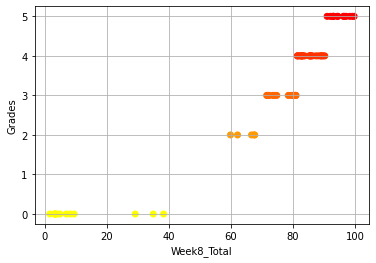

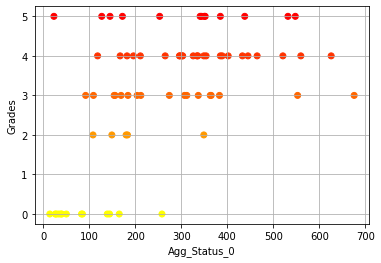

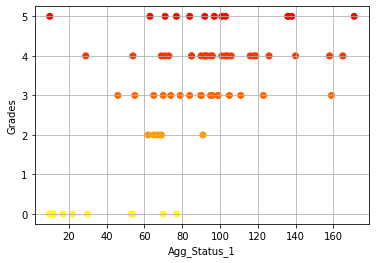

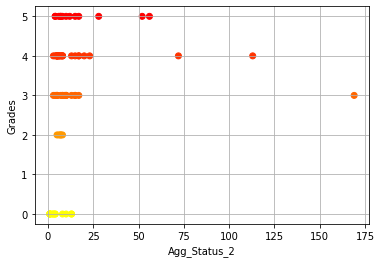

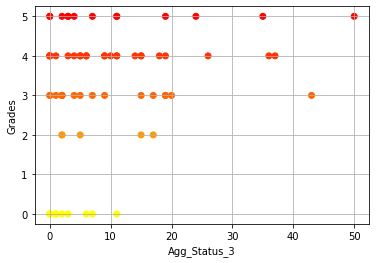

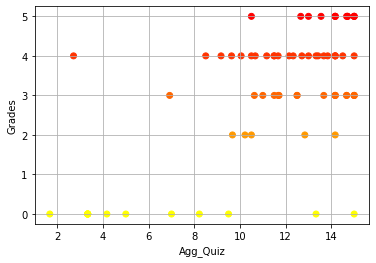

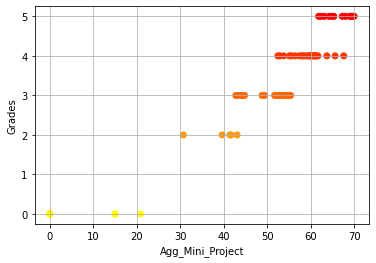

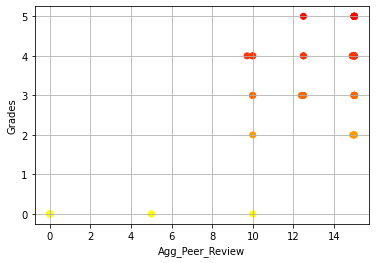

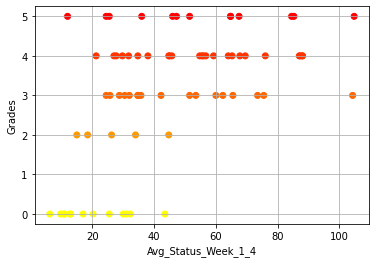

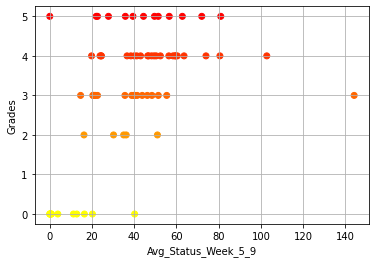

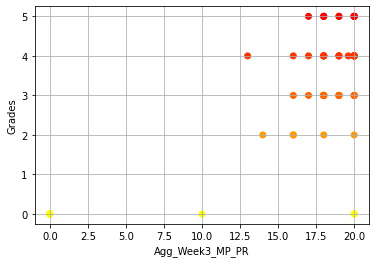

In [ ]:
# Plot the relation of each feature with each grade
def plot_feature_relation(column_name):
  plt.xlabel(column_name)
  plt.ylabel('Grades')

  pltX = data.loc[:, column_name]
  pltY = data.loc[:,'Grade']
  plt.scatter(pltX, pltY, c=pltY, cmap='autumn_r')

  plt.grid()
  plt.show()



plot_feature_relation('Week8_Total')
plot_feature_relation('Agg_Status_0')
plot_feature_relation('Agg_Status_1')
plot_feature_relation('Agg_Status_2')
plot_feature_relation('Agg_Status_3')
plot_feature_relation('Agg_Quiz')
plot_feature_relation('Agg_Mini_Project')
plot_feature_relation('Agg_Peer_Review')
plot_feature_relation('Avg_Status_Week_1_4')
plot_feature_relation('Avg_Status_Week_5_9')
plot_feature_relation('Agg_Week3_MP_PR')

# Step 3 - Train the Model
# Step 4 - Performan Evaluation
# Step 5 - Important Features

In [ ]:
def train_model(features, model_name):
  # X = feature values
  X = data[features]
  # y = target values
  y = data["Grade"]

  #Split the data into 80% training and 20% testing
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  #clf = SVC(kernel='poly', random_state=0) 
  # clf = LogisticRegression() 

  if model_name == 'nb':
    print("\n***** GAUSSIAN NAIVE BAYES MODEL *****\n")
    clf = GaussianNB()
  elif model_name == 'rf':
    print("\n******** RANDOM FORESTS MODEL ********\n")
    clf = RandomForestClassifier(n_jobs=2, random_state=5)
  
  clf.fit(x_train, y_train)

  #Test the model
  actual_target_values = y_test.values.tolist()
  print("Actual Values:    ", actual_target_values)
  predictions = clf.predict(x_test)
  print("Predicted Values: ", predictions.tolist())
  print()

  # plotting the learning curve
  print("Learning Curve:")
  esti.plot_learning_curve(clf, x_train, y_train)
  plt.show()

  #Confusion Matrix
  confusion_matrix = metrics.confusion_matrix(actual_target_values, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5])
  print("Confusion Matrix:")
  cm_display.plot()
  plt.show()

  #Check precision, recall, f1-score
  classify_report = classification_report(y_test, predictions, zero_division=0)
  print("\nClassification Report:\n", classify_report)
  acc_score = accuracy_score(y_test, predictions)
  print("Accuracy Score: ", acc_score)

  if model_name == 'rf':
    #Feature Importances
    feature_importances = list(zip(x_train, clf.feature_importances_))
    print("Feature Importances:", *feature_importances, sep='\n')
  


**GAUSSIAN NAIVE BAYES MODEL**

Features:

1.   Status 0 Aggregate
2.   Status 1 Aggregate
3.   Status 2 Aggregate
4.   Status 3 Aggregate






***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 3, 0, 3, 4, 0, 0, 4, 5, 4, 5, 0, 0, 3, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


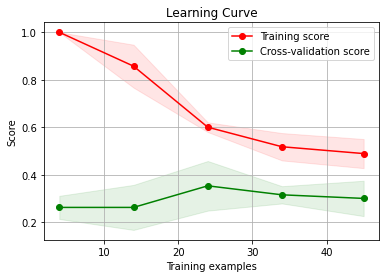

Confusion Matrix:


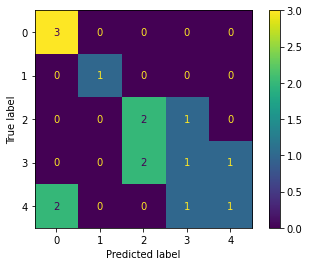


Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         1
           3       0.50      0.67      0.57         3
           4       0.33      0.25      0.29         4
           5       0.50      0.25      0.33         4

    accuracy                           0.53        15
   macro avg       0.59      0.63      0.59        15
weighted avg       0.51      0.53      0.50        15

Accuracy Score:  0.5333333333333333


In [ ]:
# to check which status type affects the grade
features = ['Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:

1.   Status 0 Aggregate
2.   Status 1 Aggregate
3.   Status 2 Aggregate
4.   Status 3 Aggregate


******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 2, 0, 3, 3, 3, 0, 4, 4, 4, 4, 0, 0, 4, 4]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


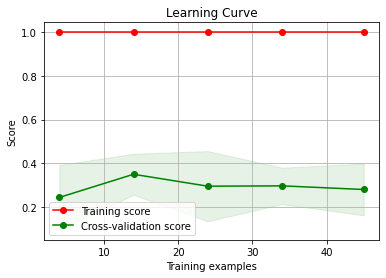

Confusion Matrix:


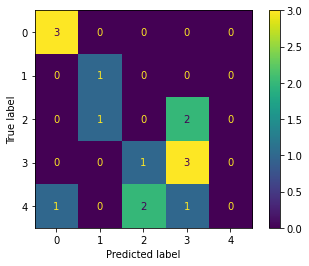


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         3
           4       0.50      0.75      0.60         4
           5       0.00      0.00      0.00         4

    accuracy                           0.47        15
   macro avg       0.35      0.55      0.42        15
weighted avg       0.32      0.47      0.38        15

Accuracy Score:  0.4666666666666667
Feature Importances:
('Agg_Status_0', 0.3399730439642327)
('Agg_Status_1', 0.2834786106028682)
('Agg_Status_2', 0.18150568635672815)
('Agg_Status_3', 0.19504265907617097)


In [ ]:
features = ['Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3']
train_model(features, 'rf')

**GAUSSIAN NAIVE BAYES MODEL**

Features:

1.   All Quizzes Aggregate
2.   All Mini Projects Aggregate
3.   All Peer Reviews Aggregate







***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 3, 0, 3, 5, 5, 4, 3, 5, 5, 5, 0, 0, 4, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


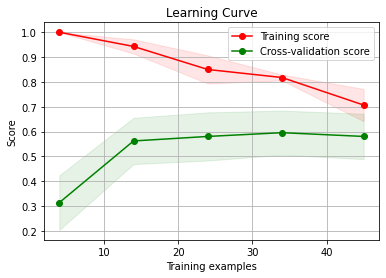

Confusion Matrix:


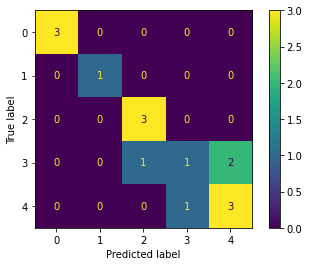


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         3
           4       0.50      0.25      0.33         4
           5       0.60      0.75      0.67         4

    accuracy                           0.73        15
   macro avg       0.77      0.80      0.77        15
weighted avg       0.71      0.73      0.70        15

Accuracy Score:  0.7333333333333333


In [ ]:
# to check which scores matters the grade
features = ['Agg_Quiz', 'Agg_Mini_Project', 'Agg_Peer_Review']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:

1.   All Quizzes Aggregate
2.   All Mini Projects Aggregate
3.   All Peer Reviews Aggregate







******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [3, 3, 0, 3, 5, 5, 4, 3, 5, 4, 5, 0, 0, 4, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


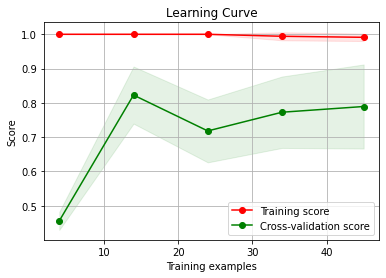

Confusion Matrix:


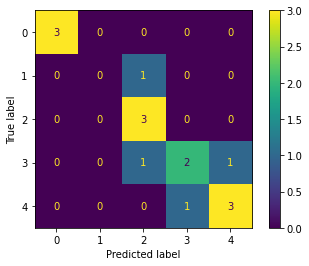


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       0.67      0.50      0.57         4
           5       0.75      0.75      0.75         4

    accuracy                           0.73        15
   macro avg       0.60      0.65      0.61        15
weighted avg       0.70      0.73      0.70        15

Accuracy Score:  0.7333333333333333
Feature Importances:
('Agg_Quiz', 0.2579101812611403)
('Agg_Mini_Project', 0.5806927759392422)
('Agg_Peer_Review', 0.16139704279961756)


In [ ]:
features = ['Agg_Quiz', 'Agg_Mini_Project', 'Agg_Peer_Review']
train_model(features, 'rf')

**GAUSSIAN NAIVE BAYES MODEL**

Features:

1.   Average Status per week from Week 1 to 4
2.   Average Status per week from Week 5 to 9








***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [3, 0, 0, 3, 3, 0, 0, 4, 4, 3, 4, 0, 0, 3, 4]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


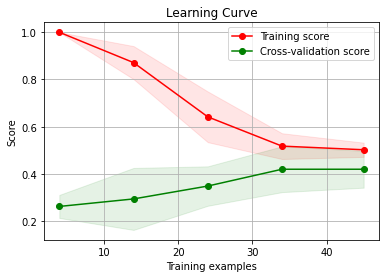

Confusion Matrix:


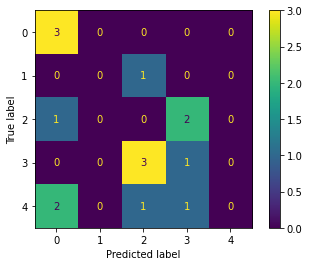


Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.25      0.25      0.25         4
           5       0.00      0.00      0.00         4

    accuracy                           0.27        15
   macro avg       0.15      0.25      0.18        15
weighted avg       0.17      0.27      0.20        15

Accuracy Score:  0.26666666666666666


In [ ]:
# to check activity in which week group matters the grade
features = ['Avg_Status_Week_1_4', 'Avg_Status_Week_5_9']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:

1.   Average Status per week from Week 1 to 4
2.   Average Status per week from Week 5 to 9








******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 5, 0, 4, 3, 3, 0, 4, 4, 3, 4, 0, 3, 4, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


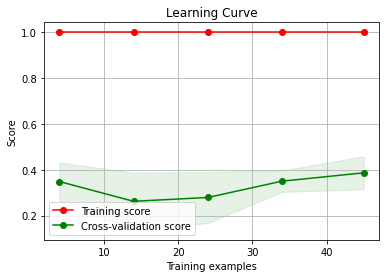

Confusion Matrix:


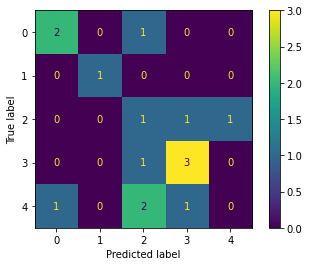


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         1
           3       0.20      0.33      0.25         3
           4       0.60      0.75      0.67         4
           5       0.00      0.00      0.00         4

    accuracy                           0.47        15
   macro avg       0.49      0.55      0.52        15
weighted avg       0.40      0.47      0.43        15

Accuracy Score:  0.4666666666666667
Feature Importances:
('Avg_Status_Week_1_4', 0.47598088385136506)
('Avg_Status_Week_5_9', 0.5240191161486351)


In [ ]:
# to check activity in which week group matters the grade
features = ['Avg_Status_Week_1_4', 'Avg_Status_Week_5_9']
train_model(features, 'rf')

**GAUSSIAN NAIVE BAYES MODEL**

Features:

1.   Average Status per week from Week 1 to 4
2.   Average Status per week from Week 5 to 9
3.   Status 0 Aggregate
4.   Status 1 Aggregate
5.   Status 2 Aggregate
6.   Status 3 Aggregate








***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 3, 0, 3, 4, 0, 0, 4, 5, 4, 4, 0, 0, 3, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


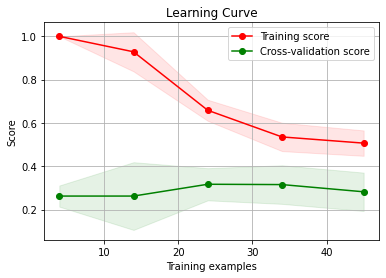

Confusion Matrix:


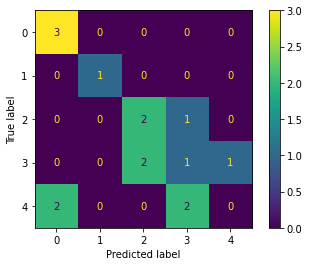


Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         1
           3       0.50      0.67      0.57         3
           4       0.25      0.25      0.25         4
           5       0.00      0.00      0.00         4

    accuracy                           0.47        15
   macro avg       0.47      0.58      0.51        15
weighted avg       0.35      0.47      0.40        15

Accuracy Score:  0.4666666666666667


In [ ]:
# to check what matters more - aggregates statuses or average of 4 weeks
features = ['Avg_Status_Week_1_4', 'Avg_Status_Week_5_9', 'Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:

1.   Average Status per week from Week 1 to 4
2.   Average Status per week from Week 5 to 9
3.   Status 0 Aggregate
4.   Status 1 Aggregate
5.   Status 2 Aggregate
6.   Status 3 Aggregate








******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 2, 0, 3, 3, 3, 0, 4, 3, 3, 4, 0, 0, 4, 5]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


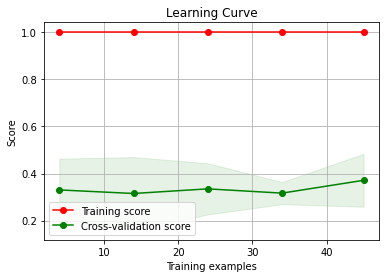

Confusion Matrix:


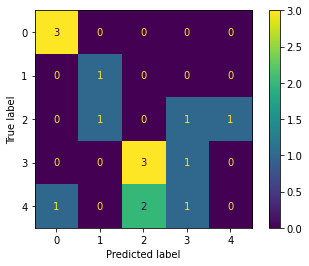


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         3
           4       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         4

    accuracy                           0.33        15
   macro avg       0.32      0.45      0.36        15
weighted avg       0.27      0.33      0.29        15

Accuracy Score:  0.3333333333333333
Feature Importances:
('Avg_Status_Week_1_4', 0.15937691378307597)
('Avg_Status_Week_5_9', 0.23427996822571606)
('Agg_Status_0', 0.18120756356569698)
('Agg_Status_1', 0.17563144479017445)
('Agg_Status_2', 0.13756124250153456)
('Agg_Status_3', 0.11194286713380197)


In [ ]:
# to check what matters more - aggregates statuses or average of 4 weeks
features = ['Avg_Status_Week_1_4', 'Avg_Status_Week_5_9', 'Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3']
train_model(features, 'rf')

**GAUSSIAN NAIVE BAYES MODEL**

Features:

1.   Aggregate of Week 3 Peer Reviews and Mini Projects









***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [4, 4, 0, 4, 3, 3, 4, 4, 3, 3, 4, 0, 0, 4, 4]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


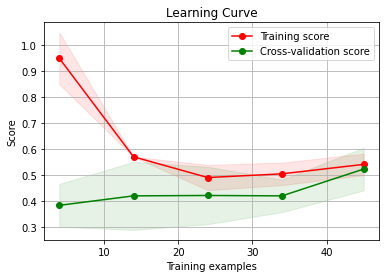

Confusion Matrix:


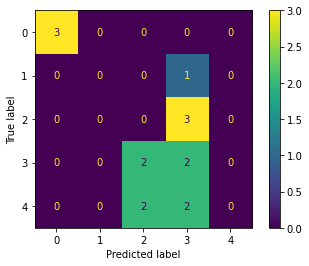


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.25      0.50      0.33         4
           5       0.00      0.00      0.00         4

    accuracy                           0.33        15
   macro avg       0.25      0.30      0.27        15
weighted avg       0.27      0.33      0.29        15

Accuracy Score:  0.3333333333333333


In [ ]:
features = ['Agg_Week3_MP_PR']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:

1.   Aggregate of Week 3 Peer Reviews and Mini Projects









******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [4, 4, 0, 4, 3, 3, 4, 4, 3, 3, 4, 0, 0, 4, 4]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


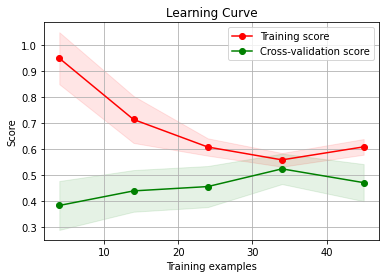

Confusion Matrix:


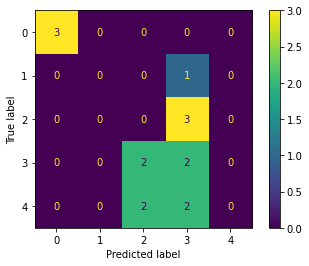


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.25      0.50      0.33         4
           5       0.00      0.00      0.00         4

    accuracy                           0.33        15
   macro avg       0.25      0.30      0.27        15
weighted avg       0.27      0.33      0.29        15

Accuracy Score:  0.3333333333333333
Feature Importances:
('Agg_Week3_MP_PR', 1.0)


In [ ]:
features = ['Agg_Week3_MP_PR']
train_model(features, 'rf')

**GAUSSIAN NAIVE BAYES MODEL**

Features:
1. All Quizzes Aggregate
2. All Mini Projects Aggregate


***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 3, 0, 3, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


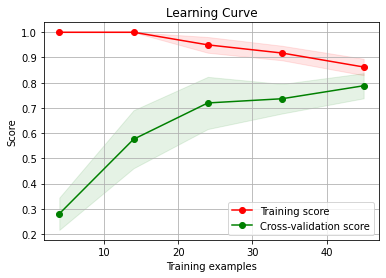

Confusion Matrix:


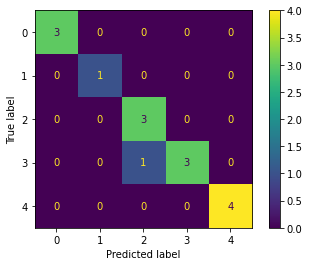


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         4

    accuracy                           0.93        15
   macro avg       0.95      0.95      0.94        15
weighted avg       0.95      0.93      0.93        15

Accuracy Score:  0.9333333333333333


In [ ]:
features = ['Agg_Quiz', 'Agg_Mini_Project']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:
1. All Quizzes Aggregate
2. All Mini Projects Aggregate


******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [3, 3, 0, 3, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


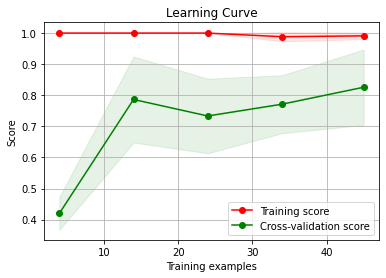

Confusion Matrix:


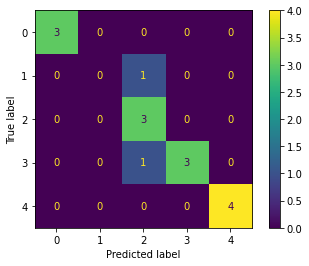


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         4

    accuracy                           0.87        15
   macro avg       0.72      0.75      0.72        15
weighted avg       0.85      0.87      0.85        15

Accuracy Score:  0.8666666666666667
Feature Importances:
('Agg_Quiz', 0.3114146027755529)
('Agg_Mini_Project', 0.6885853972244471)


In [ ]:
features = ['Agg_Quiz', 'Agg_Mini_Project']
train_model(features, 'rf')

**GAUSSIAN NAIVE BAYES MODEL**

Features:
1. All Quizzes Aggregate
2. All Mini Projects Aggregate
3. All Peer Reviews Aggregate
4. Status 0 Aggregate
5. Status 1 Aggregate
6. Status 2 Aggregate
7. Status 3 Aggregate


***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [2, 3, 0, 3, 5, 5, 4, 4, 5, 5, 5, 0, 0, 3, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


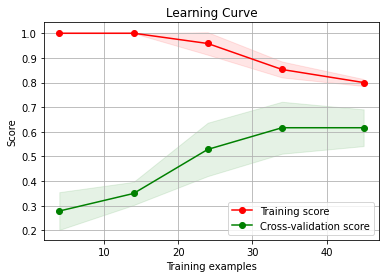

Confusion Matrix:


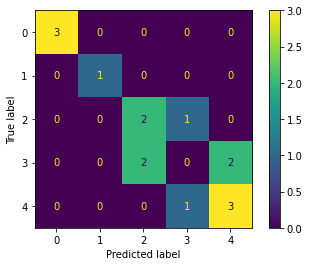


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         4
           5       0.60      0.75      0.67         4

    accuracy                           0.60        15
   macro avg       0.62      0.68      0.65        15
weighted avg       0.53      0.60      0.56        15

Accuracy Score:  0.6


In [ ]:
features = ['Agg_Quiz', 'Agg_Mini_Project', 'Agg_Peer_Review', 'Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3']
train_model(features, 'nb')

**RANDOM FORESTS MODEL**

Features:
1. All Quizzes Aggregate
2. All Mini Projects Aggregate
3. All Peer Reviews Aggregate
4. Status 0 Aggregate
5. Status 1 Aggregate
6. Status 2 Aggregate
7. Status 3 Aggregate


******** RANDOM FORESTS MODEL ********

Actual Values:     [2, 3, 0, 4, 5, 5, 5, 3, 4, 4, 5, 0, 0, 4, 3]
Predicted Values:  [3, 3, 0, 3, 5, 5, 5, 4, 5, 4, 5, 0, 0, 4, 3]

Learning Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


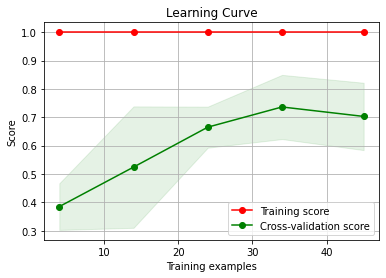

Confusion Matrix:


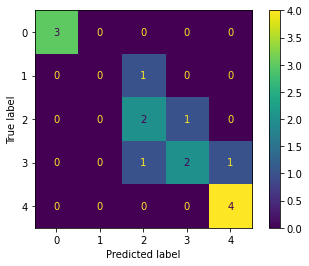


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.50      0.67      0.57         3
           4       0.67      0.50      0.57         4
           5       0.80      1.00      0.89         4

    accuracy                           0.73        15
   macro avg       0.59      0.63      0.61        15
weighted avg       0.69      0.73      0.70        15

Accuracy Score:  0.7333333333333333
Feature Importances:
('Agg_Quiz', 0.10980293299569445)
('Agg_Mini_Project', 0.3709259180460184)
('Agg_Peer_Review', 0.10933044601042616)
('Agg_Status_0', 0.14293521513313395)
('Agg_Status_1', 0.11258267181753162)
('Agg_Status_2', 0.08353903421845017)
('Agg_Status_3', 0.0708837817787451)


In [ ]:
features = ['Agg_Quiz', 'Agg_Mini_Project', 'Agg_Peer_Review', 'Agg_Status_0', 'Agg_Status_1', 'Agg_Status_2', 'Agg_Status_3']
train_model(features, 'rf')

# Predict Student Passes or Fails Course

In [ ]:
def predict_pass_fail(features):
  # X = feature values
  X = data[features]
  # y = target values
  y = data["Pass_Fail"]

  #Split the data into 80% training and 20% testing
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  #clf = SVC(kernel='poly', random_state=0) 
  # clf = LogisticRegression() 

  print("\n***** GAUSSIAN NAIVE BAYES MODEL *****\n")
  clf = GaussianNB()
  
  clf.fit(x_train, y_train)

  #Test the model
  actual_target_values = y_test.values.tolist()
  print("Actual Values:    ", actual_target_values)
  predictions = clf.predict(x_test)
  print("Predicted Values: ", predictions.tolist())
  print()

  # plotting the learning curve
  print("Learning Curve:")
  esti.plot_learning_curve(clf, x_train, y_train)
  plt.show()

  #Confusion Matrix
  confusion_matrix = metrics.confusion_matrix(actual_target_values, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5])
  print("Confusion Matrix:")
  cm_display.plot()
  plt.show()

  #Check precision, recall, f1-score
  classify_report = classification_report(y_test, predictions, zero_division=0)
  print("\nClassification Report:\n", classify_report)
  acc_score = accuracy_score(y_test, predictions)
  print("Accuracy Score: ", acc_score)

  



***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     ['Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass']
Predicted Values:  ['Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass']

Learning Curve:


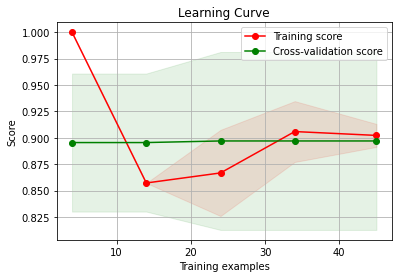

Confusion Matrix:


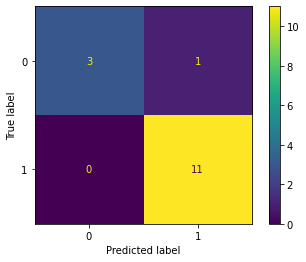


Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      0.75      0.86         4
        Pass       0.92      1.00      0.96        11

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15

Accuracy Score:  0.9333333333333333


In [ ]:
features = ['Agg_Week3_MP_PR']
predict_pass_fail(features)

**Conclusion**

It can be predicted with great accuracy from students performance in First Mini Project and Peer Review (which takes place in Week 3), if the student will pass the course or not.


***** GAUSSIAN NAIVE BAYES MODEL *****

Actual Values:     ['Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass']
Predicted Values:  ['Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass']

Learning Curve:


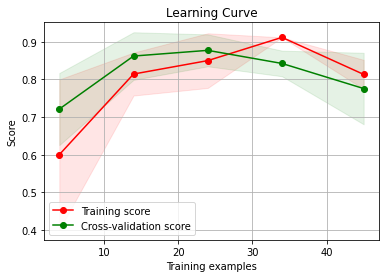

Confusion Matrix:


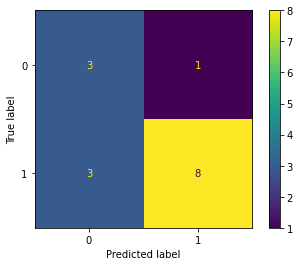


Classification Report:
               precision    recall  f1-score   support

        Fail       0.50      0.75      0.60         4
        Pass       0.89      0.73      0.80        11

    accuracy                           0.73        15
   macro avg       0.69      0.74      0.70        15
weighted avg       0.79      0.73      0.75        15

Accuracy Score:  0.7333333333333333


In [ ]:
features = ['Avg_Status_Week_1_4']
predict_pass_fail(features)

**Conclusion**

It is however to a little less accurate to predict if a student will pass the course or not based on its Average Course Logs (Statuses) of first 4 weeks.